# Základy práce s Python v Google API - Vision
Python lze použít jako základní scriptovací jazyk, nebo jako silný programovací jazyk s objekty a vlasními knohovnami. V tomto cvičení budeme využívat ukázek spouštěšní scriptů v prostředí jupyter, které umožňuje interaktivní práci s jazykem Python. Detaily na (https://jupyter.org/).

# Filip Hron, Petr Hrobař, Veronika Šuláková, Barbora Kupková

Příkazy se zpracovávají jeden po druhém, symbol ukončení je konec řádku, vnitřní blok se odděluje tabulátorem

# Google API a instalace knihoven
Klíčové knihovny, které budeme používat pro práci s google api jsou k dispozici v rámci instalačních balíků pomocí pip (https://pip.pypa.io/en/stable/) nebo přes nástroj Anaconda (https://www.anaconda.com/) (již máte nainsotalované na vašich virtuálních strojích). Konkrétní knihovny, které budeme potřebovat jsou nálsedující:
- `google-cloud-language` pro analýzu jazyka
- `google-cloud-vision` pro analýzu pbrazu
- `google-cloud` zastřešující balík, pokud nechcete načítat jednotlivé balíky 
- `google-oauth` pro zajištění snadné autentizace

Je důležité vědět, jak si potřebné knihovny do Python nainstalovat. K tomu slouží příkaz

```pip install --user --upgrade google-cloud-language google-cloud google-cloud-vision google-oauth matplotlib ipython```,

který spusťte v příkazové řádce (Windows => Start => Command prompt)

Základem jazyka Python je práce s knihovnami a kontrola, že vše je správně nainstalované. Načtení knihovan a ověření provedeme pomocí následujícího příkazu:

In [235]:
from google.cloud import vision
from google.oauth2 import service_account

V případě, že se vám povedlo předchozí příkazy spustit bez chybových hlášek, je vše korektně nainstalováno a je možné začít pracovat s Google API. Než k tomu přistoupíme, bude potřeba ještě nahrát knihovny pro práci s obrázky

In [236]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io
import pandas as pd
import numpy as np
import seaborn as sns

Dalším kontrolním bodem je schopnost přihlásit se k vašemu účtu z Python, k tomu slouží následující příkazy. Je potřeba začít s tím, aby jste již vygenerovaný soubor s přihlašovacími údaji zpřístupnili pythony:

In [237]:
creds = service_account.Credentials.from_service_account_file('./project-hrof01-239cf2bd85b2.json')

In [238]:
client = vision.ImageAnnotatorClient(credentials=creds)

Začneme jednoduchým testem funkčnosti API na jednom obrázku, odkaz na název dejme do proměnné:

In [239]:
soubor = './data/tym7/100002.jpg'

Načteme obrázek ze souboru:

In [240]:
with io.open(soubor, 'rb') as image_file:
    content = image_file.read()

Předáme obrázek do Google knihovny ```vision```:

In [241]:
image = vision.Image(content = content)

Nyní můžeme odeslat obrázek ke zpracování pomocí Google API a získat popis obrázku pomocí funkce ```label_detection```. Detail k funkci najdete na následujících stránkách (https://googleapis.dev/python/vision/latest/vision_v1/services.html).

In [242]:
response = client.label_detection(image = image)

Výstup je k dispozici v pomocí funkce ```label_annotations```

In [243]:
labels = response.label_annotations

Než si projdeme popisky obrázku vrácené funkcí Google API, podívejme se na obrázek.

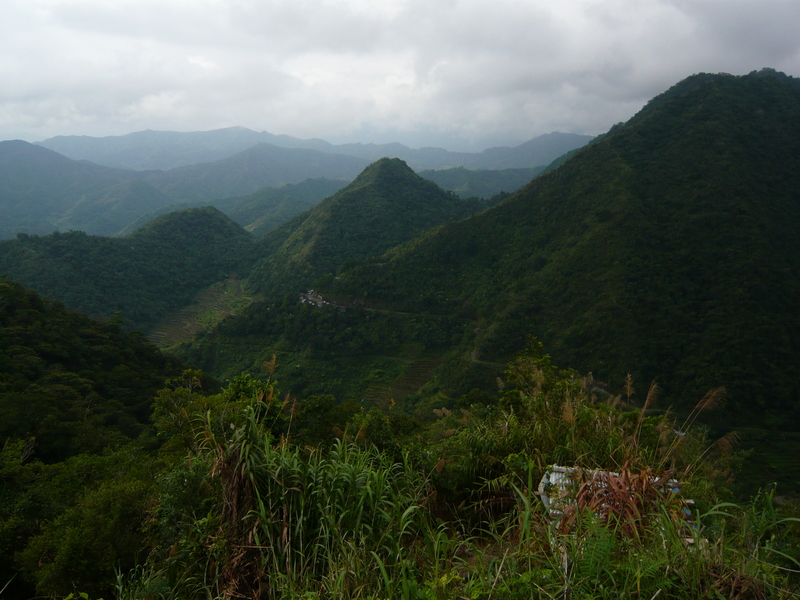

In [244]:
Image(soubor)

Nyní se podívejme, jaké ```Labels``` nám Google API vrátil:

In [245]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Vegetation
Nature
Mountainous landforms
Natural environment
Highland
Hill
Natural landscape
Plant community
Mountain range
Mountain


# Nyní trocha automatizace
projdeme všechny soubory v adresáři a provedeme analýzu na nich:

In [246]:
import os

In [247]:
path = './data/tym7'

In [248]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [249]:
labels_images = {}

In [250]:
directories = os.listdir(path)

In [251]:
for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

In [252]:
print(labels_images)

{'./data/tym7\\100002.jpg': ['Vegetation', 'Nature', 'Mountainous landforms', 'Natural environment', 'Highland', 'Hill', 'Natural landscape', 'Plant community', 'Mountain range', 'Mountain'], './data/tym7\\100301.jpg': ['Vegetation', 'Nature', 'Natural landscape', 'Landscape', 'Plant community', 'Highland', 'Plantation', 'Terrace', 'Rural area', 'Nature reserve'], './data/tym7\\100503.jpg': ['Vegetation', 'Mountainous landforms', 'Highland', 'Plant community', 'Hill', 'Mountain', 'Nature reserve', 'Atmospheric phenomenon', 'Hill station', 'Forest'], './data/tym7\\100801.jpg': ['Coastal and oceanic landforms', 'Coast', 'Shore', 'Fluid', 'Rock', 'Ocean', 'Horizon', 'Beach', 'Sea', 'Wave'], './data/tym7\\101400.jpg': ['Sky', 'Fluid', 'Sunset', 'Dusk', 'Cloud', 'Liquid', 'Evening', 'Sunrise', 'Afterglow', 'Horizon'], './data/tym7\\101700.jpg': ['Body of water', 'Underwater', 'Organism', 'Fluid', 'Natural environment', 'Coral reef', 'Coral', 'Fish', 'Algae', 'Stony coral'], './data/tym7\\10

In [253]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

In [254]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)

In [255]:
print(sort_tabs[0])

('Fluid', [5, ['./data/tym7\\100801.jpg', './data/tym7\\101400.jpg', './data/tym7\\101700.jpg', './data/tym7\\103401.jpg', './data/tym7\\103601.jpg']])


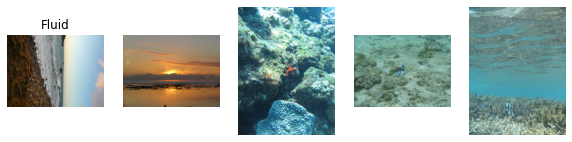

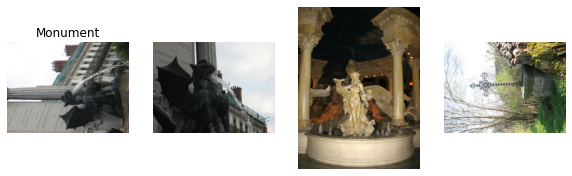

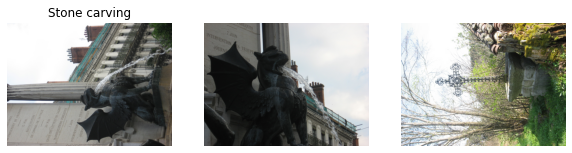

In [256]:
for k in range(3):
    pocet = sort_tabs[k][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()

In [257]:
res = pd.DataFrame()
ii = 0
for i,y in sort_tabs: 
    if ii < 20 :
        res.loc[ii,"element"] = i
        res.loc[ii,"counts"] = y[0]
        ii = ii + 1

<AxesSubplot:xlabel='element'>

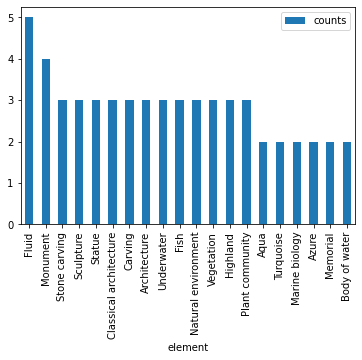

In [258]:
res.index = res['element']
res.plot.bar()